<a href="https://colab.research.google.com/github/vitaoTM/python_projects/blob/master/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de vendas

#### Importando ferramentas para o projeto

In [2]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot

## Importando dados

In [3]:
alucar = pd.read_csv('/content/drive/MyDrive/CODE/ALURA/material+curso+-+Time+Series/material curso - Time Series/alucar.csv')

In [4]:
alucar.head(3)

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33


In [5]:
alucel = pd.read_csv('/content/drive/MyDrive/CODE/ALURA/material+curso+-+Time+Series/material curso - Time Series/alucel.csv')
alucel.head(3)

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36


In [6]:
print(f'Quantidade de linhas e colunas {alucar.shape}')

Quantidade de linhas e colunas (24, 2)


In [7]:
print(f'Quntidade de dados nulos = {alucar.isna().sum().sum()}')

Quntidade de dados nulos = 0


In [8]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [9]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

### Plotando e estilizando graficos 

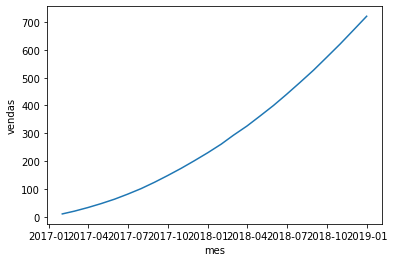

In [10]:
sns.lineplot(x='mes', y='vendas', data=alucar)

Text(0, 0.5, 'Numero de vendas')

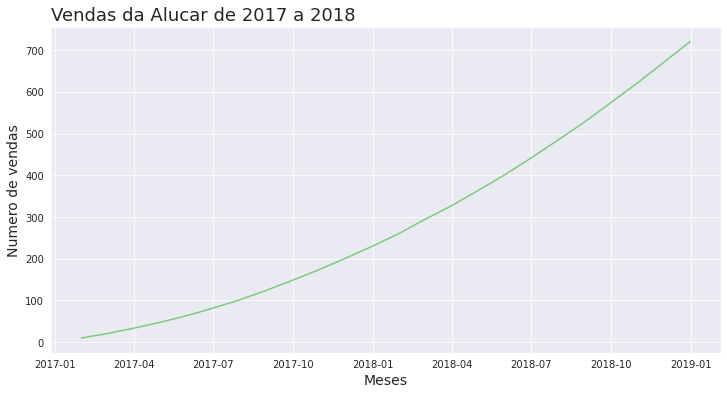

In [11]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas da Alucar de 2017 a 2018', loc='left', fontsize=18)
ax.set_xlabel('Meses', fontsize=14)
ax.set_ylabel('Numero de vendas', fontsize=14)

In [12]:
print('AHHHH')

AHHHH


In [13]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head(5)

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


Text(0, 0.5, 'Aumento de vendas')

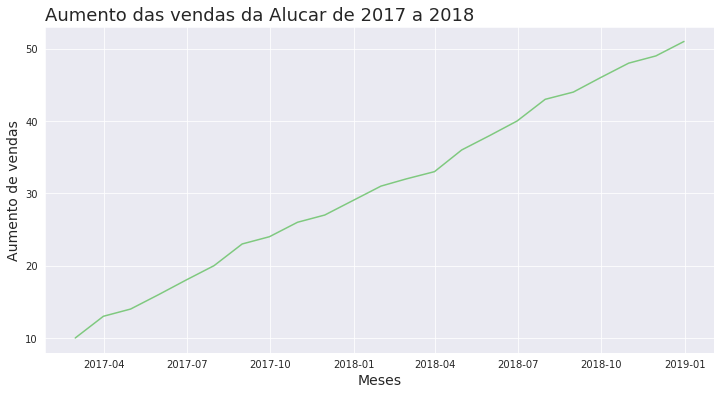

In [14]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

ax2 = sns.lineplot(x='mes', y='aumento', data=alucar)
ax2.figure.set_size_inches(12,6)
ax2.set_title('Aumento das vendas da Alucar de 2017 a 2018', loc='left', fontsize=18)
ax2.set_xlabel('Meses', fontsize=14)
ax2.set_ylabel('Aumento de vendas', fontsize=14)

### Automatizando criando uma função

In [15]:
def plotar(titulo, label_x, label_y, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax2 = sns.lineplot(x=x, y=y, data=dataset)
    ax2.figure.set_size_inches(12,6)
    ax2.set_title(titulo, loc='left', fontsize=18)
    ax2.set_xlabel(label_x,  fontsize=14)
    ax2.set_ylabel(label_y, fontsize=14)
    ax2=ax2

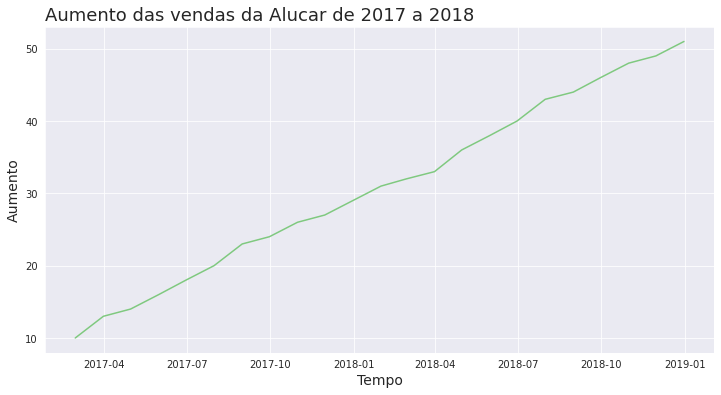

In [16]:
plotar('Aumento das vendas da Alucar de 2017 a 2018', 'Tempo',
       'Aumento', 'mes', 'aumento', alucar)

In [17]:
alucar['aceleracao'] = alucar['aumento'].diff()

In [18]:
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


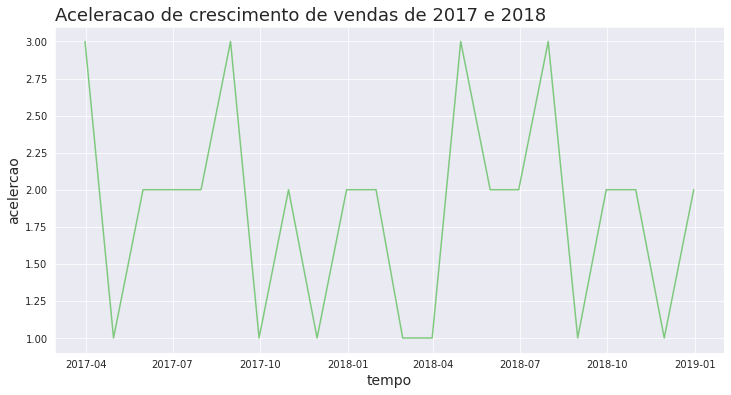

In [19]:
plotar('Aceleracao de crescimento de vendas de 2017 e 2018', 'tempo', 
       'acelercao', 'mes', 'aceleracao', alucar)

Decomposição dos dados

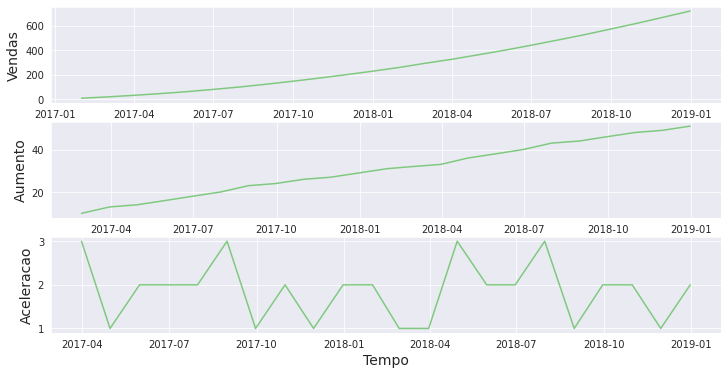

In [20]:
plt.figure(figsize=(18,16))
ax = plt.subplot(3, 1, 1)
ax.set_title('Analise de vendas da alucar de 2017 e 2018', fontsize =(18), loc='left')
plotar('', 'Tempo',
       'Vendas', 'mes', 'vendas', alucar)
plt.subplot(3,1,2)
plotar('', 'Tempo',
       'Aumento', 'mes', 'aumento', alucar)
plt.subplot(3,1,3)
plotar('', 'Tempo',
       'Aceleracao', 'mes', 'aceleracao', alucar)

## **Autocorrelação** 


Correlação de valores de uma mesma variável ordenados no tempo.

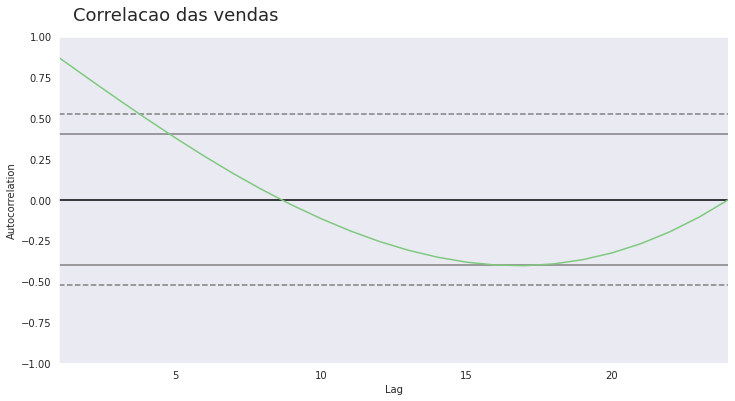

In [27]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlacao das vendas', fontsize =18, x=0.26, y=.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

In [46]:
def auto_correlacao(titulo, dataset, indice):
    ax = plt.figure(figsize=(12,6))
    ax.suptitle(titulo, fontsize =18, x=0.26, y=.95)
    autocorrelation_plot(alucar[dataset][indice:])
    ax= ax

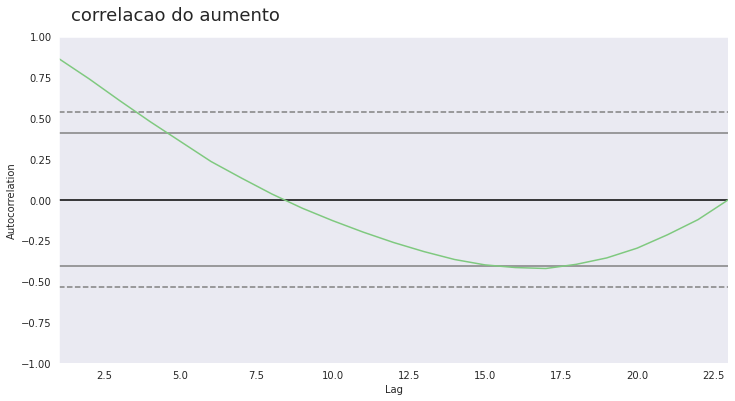

In [47]:
auto_correlacao('Correlacao do aumento', 'aumento', 1)

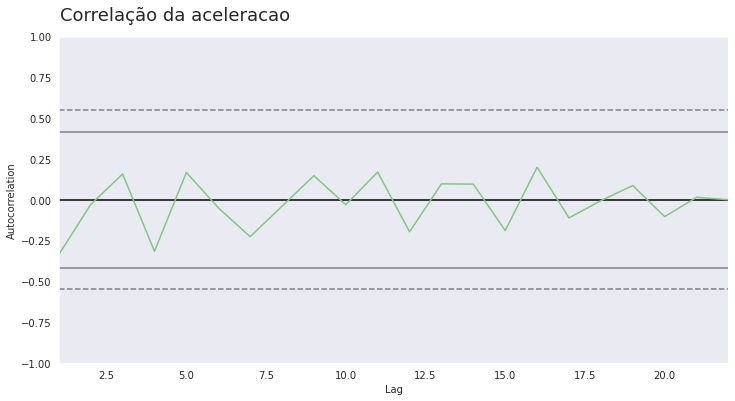

In [48]:
auto_correlacao('Correlação da aceleracao', 'aceleracao', 2)